In [4]:
import pandas as pd 
df = pd.read_csv('Reviews.csv', encoding='utf-8',nrows= 6000)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
5995,5996,B000I6PXLC,A1EWO3RDAXB4VO,J. OTTO,1,7,1,1278720000,This is not that great,You have to put a lot of sugar in this to mak...
5996,5997,B003SE52K8,AXSV7TB3PCP95,Linda Morton,5,5,5,1313280000,"The ""paws down"" favorite among canned food!","My female Pixie Bob cat, Pawnee, is extremely ..."
5997,5998,B003SE52K8,A14JSPGLFT4C68,Brian Field,4,4,5,1331596800,Worked great for my cat,This is a great food and my cat loves it! The ...
5998,5999,B003SE52K8,AHDUT7IGZW7HY,"AlleyCat Advocat ""Laure""",4,4,5,1312761600,IBD food that my cat will actually eat!!!!!!!!,I was at my wits end with hypoallergenic foods...


In [ ]:
df.shape

(6000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      6000 non-null   int64 
 1   ProductId               6000 non-null   object
 2   UserId                  6000 non-null   object
 3   ProfileName             6000 non-null   object
 4   HelpfulnessNumerator    6000 non-null   int64 
 5   HelpfulnessDenominator  6000 non-null   int64 
 6   Score                   6000 non-null   int64 
 7   Time                    6000 non-null   int64 
 8   Summary                 6000 non-null   object
 9   Text                    6000 non-null   object
dtypes: int64(5), object(5)
memory usage: 468.9+ KB


In [ ]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
df['Text'].isnull().sum()

0

In [ ]:
df.dropna(inplace = True)
df

In [ ]:
fields = ['Text']
text2 = pd.read_csv('Reviews.csv', usecols=fields,encoding='utf-8',nrows= 6000)
text2

,Text
0,I have bought several of the Vitality canned d...
1,Product arrived labeled as Jumbo Salted Peanut...
2,This is a confection that has been around a fe...
3,If you are looking for the secret ingredient i...
4,Great taffy at a great price. There was a wid...
...,...
5995,You have to put a lot of sugar in this to mak...
5996,"My female Pixie Bob cat, Pawnee, is extremely ..."
5997,This is a great food and my cat loves it! The ...
5998,I was at my wits end with hypoallergenic foods...


In [ ]:
text2['Text'].isnull().sum()

0

In [ ]:
text2.dropna(inplace = True)
text2

In [ ]:
from wordcloud import WordCloud, STOPWORDS
wordcloud2 = WordCloud().generate(' '.join(text2['Text']))

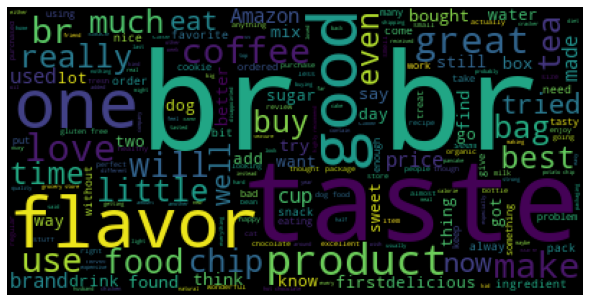

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
df['Score'].value_counts()

5    3838
4     811
1     557
3     457
2     337
Name: Score, dtype: int64

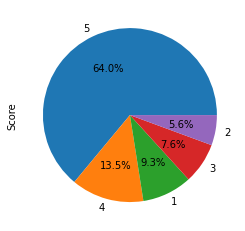

In [ ]:
df['Score'].value_counts().plot.pie(autopct='%1.1f%%')

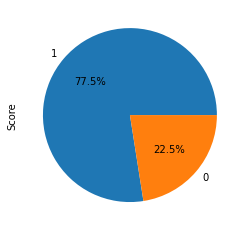

In [ ]:
def sentiment_rating(rating):
    # Replacing ratings of 1,2,3 with 0 (not good) and 4,5 with 1 (good)
    if(int(rating) == 1 or int(rating) == 2 or int(rating) == 3):
        return 0
    else: 
        return 1
df.Score= df.Score.apply(sentiment_rating) 
# df.Score.head()
df.Score.value_counts().plot.pie(autopct='%1.1f%%')

In [ ]:
df['Score'].value_counts()

1    4649
0    1351
Name: Score, dtype: int64

In [ ]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
5995,5996,B000I6PXLC,A1EWO3RDAXB4VO,J. OTTO,1,7,0,1278720000,This is not that great,You have to put a lot of sugar in this to mak...
5996,5997,B003SE52K8,AXSV7TB3PCP95,Linda Morton,5,5,1,1313280000,"The ""paws down"" favorite among canned food!","My female Pixie Bob cat, Pawnee, is extremely ..."
5997,5998,B003SE52K8,A14JSPGLFT4C68,Brian Field,4,4,1,1331596800,Worked great for my cat,This is a great food and my cat loves it! The ...
5998,5999,B003SE52K8,AHDUT7IGZW7HY,"AlleyCat Advocat ""Laure""",4,4,1,1312761600,IBD food that my cat will actually eat!!!!!!!!,I was at my wits end with hypoallergenic foods...


In [ ]:
x = df.iloc[:,9].values
y = df.iloc[:,6].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=100)


In [ ]:
x_train.shape

(4200,)

In [ ]:
x_test.shape

(1800,)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
# Pipeline([('Variable 1',Method 1()),('Variable 2',Method 2())])

In [ ]:
text_model = Pipeline([('tfidf',TfidfVectorizer()),('model',MultinomialNB())])

In [ ]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [ ]:
y_pred = text_model.predict(x_test)
print(y_pred)

[1 1 1 ... 1 1 1]


In [ ]:
y_test

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_pred,y_test)*100

77.77777777777779

In [ ]:
confusion_matrix(y_pred,y_test)

array([[   1,    0],
       [ 400, 1399]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      1.00      0.00         1
           1       1.00      0.78      0.87      1799

    accuracy                           0.78      1800
   macro avg       0.50      0.89      0.44      1800
weighted avg       1.00      0.78      0.87      1800

